In [3]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-m1s8dod7
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-m1s8dod7
     |████████████████████████████████| 14.7MB 320kB/s 
     |████████████████████████████████| 10.9MB 17.7MB/s 
  Created wheel for geopandas: filename=geopandas-0.7.0+52.g8339c1c-py2.py3-none-any.whl size=949999 sha256=4046b7b0862f0898ecd8111ffac6b5e20ededfa445ff6e6eb09390238dcc7747
  Stored in directory: /tmp/pip-ephem-wheel-cache-0cxtuzp9/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


In [0]:
#Anteriormente foi instalada a biblioteca GeoPandas que será usada para plotar um gráfico logo mais
#Importamos todas tabela que serão usados 

#%matplotlib inline define que a biblioteca matplotlib abrirá os dados no colab
%matplotlib inline

import matplotlib.pyplot as plt; plt.rcdefaults() 
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.graph_objects as go
import geopandas as gpd

from pandas import read_csv

In [0]:
#Puxamos os dados sobre Game of Thrones da tabela character-predictions, que foi retirada do site
#https://www.kaggle.com/mylesoneill/game-of-thrones

game = pd.read_csv("character-predictions.csv") 

#Já separamos em variaveis os nomes dos personagens e sua popularidade
#Indice recebe um arranjo do tamanho da variavel nomes

names = game["name"]
popularidade = game["popularity"]
indice = np.arange(len(names)) 

#iremos filtrar a tabela original para receber somente os dados em que a popularidade seja acima de 70%
#importante frisar que nesta pesquisa os participantes escolhiam os seus personagens preferidos
#não tendo um limite de escolha, por isto alguns personagens terão popularidade total

gamefiltrado = game.loc[game["popularity"]>0.7]


In [43]:
gamefiltrado = gamefiltrado.fillna(0)

#Os dados que forem Na na tabela serão substituidos por 0 utilizando a função fillna

print(gamefiltrado)

      S.No  actual  pred  ...  isPopular  popularity isAlive
1        2       1     0  ...          1    0.896321       1
5        6       1     0  ...          1    1.000000       1
50      51       0     0  ...          1    1.000000       0
53      54       0     0  ...          1    0.705686       0
54      55       1     0  ...          1    1.000000       1
101    102       0     0  ...          1    1.000000       0
172    173       1     0  ...          1    1.000000       1
273    274       1     0  ...          1    0.969900       1
280    281       0     0  ...          1    1.000000       0
281    282       0     0  ...          1    0.759197       0
296    297       0     0  ...          1    1.000000       0
438    439       0     0  ...          1    0.765886       0
506    507       1     0  ...          1    0.739130       1
1466  1467       1     0  ...          1    1.000000       1
1474  1475       1     0  ...          1    1.000000       1
1481  1482       1     1

In [0]:
pop = list(gamefiltrado["popularity"]*100)
nome = list(gamefiltrado["name"])
ind = np.arange(len(nome)) 

#A função list transforma as variaveis em lista, isso é necessário para a criação do gráfico de barras
#Definiremos que pop receberá a popularidade dos personagens multiplicado por 100 para se transformar em porcentagem
#nome receberá os nomes que estão na tabela que foi filtrada
#ind receberá um arranjo que terá o tamanho da variavel nome


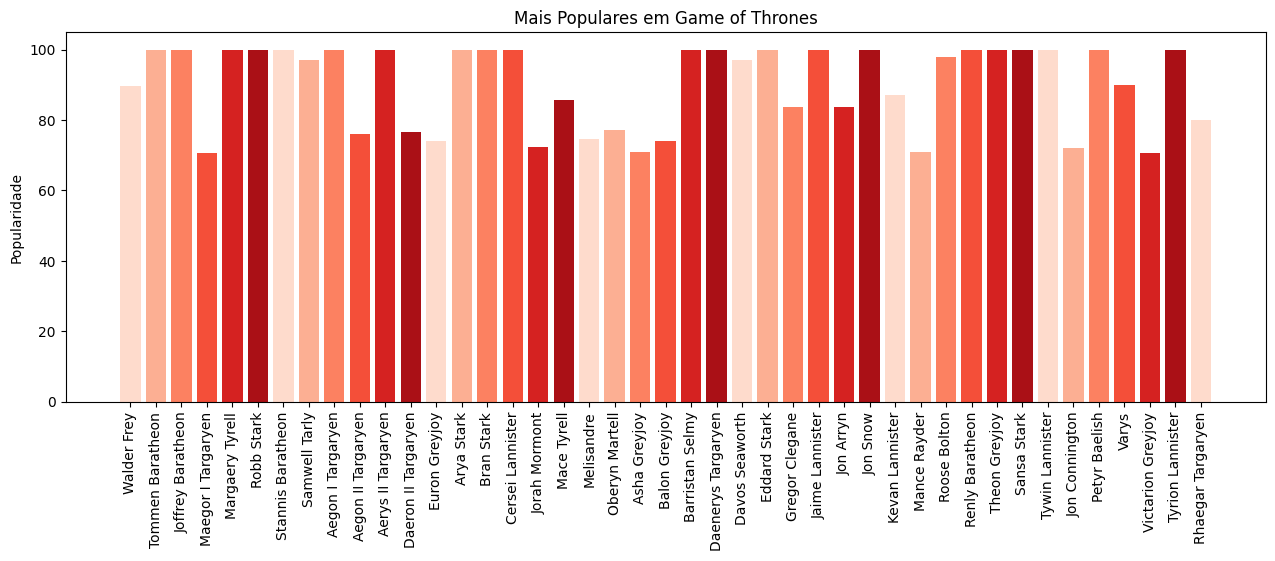

In [236]:
#Plt.bar cria o gráfico de barras
#ind será o tamanho dos dados que serão anexados ao gráfico
#pop será o dado 'y' que será aplicado ao gráfico
#nome será o dado 'x' que será aplicado ao gráfico
#"color" reberá uma paleta de cores que estarão próximas do vermelho
#rotation girá os nomes das colunas 90° para ficarem mais legíveis
#ylabel será o título das colunas no lado esquerdo, pode-se usar xlabel também
#title será os título do gráfico, logo acima dele

plt.bar(ind, pop, color=sns.color_palette("Reds")) 
plt.xticks(ind, nome, rotation=90) 
plt.subplots_adjust(right = 2)
plt.ylabel('Popularidade') 
plt.title('Mais Populares em Game of Thrones') 
 
plt.show() 

In [6]:
##O arquivo foi retirado do site: https://github.com/gabrielzanlorenssi/presidential_approval/blob/master/aprovacao.csv

presidentes = pd.read_csv("aprovacao.csv") 
presidentes = presidentes.fillna(0)

#Neste passo estamos pegando os dados de um csv chamado aprovacao e colocando dentro da tabela presidentes
#fillna irá avaliar os dados que tiverem NA em sua composição e irá substitui-los por 0

#Neste passo abaixo, iremos criar matrizes de uma coluna que contém os dados de votação separados

lider = presidentes["presidente"]
ru = presidentes["ruim"]
reg = presidentes["regular"]
ot = presidentes["otimo_bom"]

#A variavel number cria um arranjo que terá o tamanho da tabela lider, que será usado mais a frente

number = np.arange(len(lider)) 
print(lider)

FileNotFoundError: ignored

In [0]:
#Iremos filtrar os dados e faremos tabelas para cada presidente
#para facilitar cálculos, e o filtro ocorre graças ao comando loc

Temer = presidentes.loc[presidentes["presidente"]=="TEMER"]
Dilma = presidentes.loc[presidentes["presidente"]=="DILMA"]
Lula = presidentes.loc[presidentes["presidente"]=="LULA"]
Sarney = presidentes.loc[presidentes["presidente"]=="SARNEY"]
Collor = presidentes.loc[presidentes["presidente"]=="COLLOR"]
Itamar = presidentes.loc[presidentes["presidente"]=="ITAMAR"]
FHC = presidentes.loc[presidentes["presidente"]=="FHC"]

In [0]:
#Depois que o filtro foi realizado, agora é a hora de calcular a soma da coluna "otimo_bom"
#de cada presidente, sabendo assim quando votos cada um teve, respectivos a esse dado, no caso "bom"

PTotal = sum(presidentes["otimo_bom"])
#Claro também precisamos saber quantos votos "bom" foram realizados para sabermos a proporção de cada presidente

PTemer = sum(Temer["otimo_bom"])
PDilma = sum(Dilma["otimo_bom"])
PLula = sum(Lula["otimo_bom"])
PSarney = sum(Sarney["otimo_bom"])
PCollor = sum(Collor["otimo_bom"])
PItamar = sum(Itamar["otimo_bom"])
PFHC = sum(FHC["otimo_bom"])

In [67]:
marcas = ['Temer','Dilma', 'Collor','Lula','Sarney','Itamar','FHC']
popular = [PTemer*100/PTotal, PDilma*100/PTotal, PCollor*100/PTotal, PLula*100/PTotal, PSarney*100/PTotal, PItamar*100/PTotal, PFHC*100/PTotal]
colors=["blue", "red", "yellow", "green", "pink", "brown", "grey"]

#Marcas recebe os nomes dos presidentes em ordem que definirá a apresentação dos dados mais a frente
#Em popular é calculado a proporção de votos "bom" de cada presidente e criada uma lista
#Colors já define as cores respectivas de cada presidente para uso de um gráfico

print(popular)

[0.8203926164664518, 21.901552886024025, 3.017872839144448, 45.209493114561965, 2.8713741576325815, 6.035745678288896, 20.14356870788163]


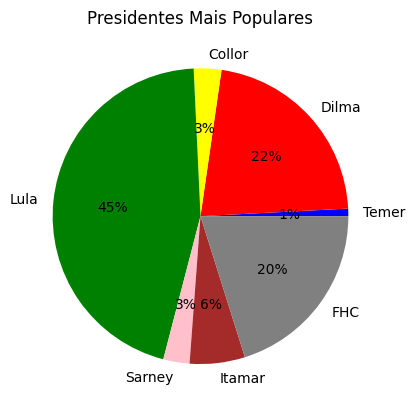

In [230]:
plt.pie(popular, labels=marcas, colors=colors, autopct="%1.f%%", shadow=False, startangle=0) 
plt.title('Presidentes Mais Populares') 

#plt.pie diz que será criado um gráfico de pizza, trazendo a variavel popular como seu dado,
#labels receberá o nome dos presidentes para servir como título das fatias
#colors recebe as cores dos respectivos presidentes
#autopct define as casas decimais que serão apresentadas no gráfico
#shadow false diz que não haverá uma sombra abaixo da pizza, deixando mais legível o gráfico neste caso
#startangle define o ângulo que o gráfico irá iniciar

#plt.show apresenta o gráfico a nós
plt.show()

In [57]:
#Depois que o filtro foi realizado, agora é a hora de calcular a soma da coluna "regular"
#de cada presidente, sabendo assim quando votos cada um teve, respectivos a esse dado, no caso "regular"

RTotal = sum(presidentes["regular"])
#Claro também precisamos saber quantos votos "regular" foram realizados para sabermos a proporção de cada presidente

RTemer = sum(Temer["regular"])
RDilma = sum(Dilma["regular"])
RLula = sum(Lula["regular"])
RSarney = sum(Sarney["regular"])
RCollor = sum(Collor["regular"])
RItamar = sum(Itamar["regular"])
RFHC = sum(FHC["regular"])

print(RTotal)

6471.0


In [65]:
marcas = ['Temer','Dilma','Collor','Lula','Sarney','Itamar','FHC']
regular = [RTemer*100/RTotal, RDilma*100/RTotal, RCollor*100/RTotal, RLula*100/RTotal, RSarney*100/RTotal, RItamar*100/RTotal, RFHC*100/RTotal]
colors=["blue", "red", "yellow", "green", "pink", "brown", "grey"]

#Marcas recebe os nomes dos presidentes em ordem que definirá a apresentação dos dados mais a frente
#Em regular é calculado a proporção de votos "regular" de cada presidente e criada uma lista
#Colors já define as cores respectivas de cada presidente para uso de um gráfico

print(regular)

[2.7970947303353424, 21.882243857209087, 3.693401329006336, 27.677329624478443, 3.847936949466852, 12.331942512749189, 27.77005099675475]


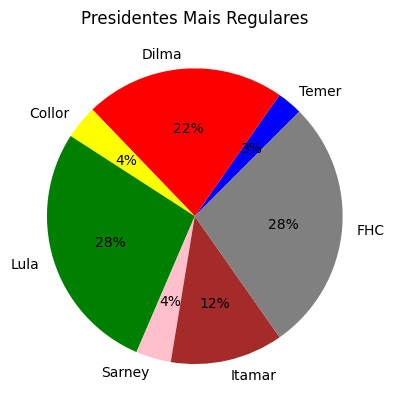

In [231]:
plt.pie(regular, labels=marcas, colors=colors, autopct="%1.f%%", shadow=False, startangle=45) 
plt.title('Presidentes Mais Regulares') 

#plt.pie diz que será criado um gráfico de pizza, trazendo a variavel regular como seu dado,
#labels receberá o nome dos presidentes para servir como título das fatias
#colors recebe as cores dos respectivos presidentes
#autopct define as casas decimais que serão apresentadas no gráfico
#shadow false diz que não haverá uma sombra abaixo da pizza, deixando mais legível o gráfico neste caso
#startangle define o ângulo que o gráfico irá iniciar

plt.show()

In [60]:
#Depois que o filtro foi realizado, agora é a hora de calcular a soma da coluna "ruim"
#de cada presidente, sabendo assim quando votos cada um teve, respectivos a esse dado, no caso "ruim"

ETotal = sum(presidentes["ruim"])
#Claro também precisamos saber quantos votos "ruim" foram realizados para sabermos a proporção de cada presidente

ETemer = sum(Temer["ruim"])
EDilma = sum(Dilma["ruim"])
ELula = sum(Lula["ruim"])
ESarney = sum(Sarney["ruim"])
ECollor = sum(Collor["ruim"])
EItamar = sum(Itamar["ruim"])
EFHC = sum(FHC["ruim"])

print(ETotal)

5045


In [63]:
marcas = ['Temer','Dilma','Collor','Lula','Sarney','Itamar','FHC']
ruim = [ETemer*100/ETotal, EDilma*100/ETotal, ECollor*100/ETotal, ELula*100/ETotal, ESarney*100/ETotal, EItamar*100/ETotal, EFHC*100/ETotal]
colors=["blue", "red", "yellow", "green", "pink", "brown", "grey"]

#Marcas recebe os nomes dos presidentes em ordem que definirá a apresentação dos dados mais a frente
#Em ruim é calculado a proporção de votos "ruim" de cada presidente e criada uma lista
#Colors já define as cores respectivas de cada presidente para uso de um gráfico

print(ruim)

[8.662041625371655, 24.4400396432111, 4.638255698711595, 14.925668979187314, 13.716551040634291, 7.670961347869177, 25.946481665014865]


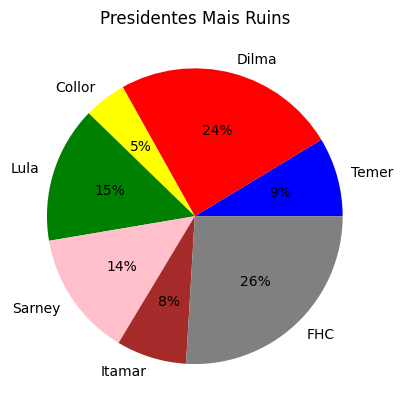

In [64]:
plt.pie(ruim, labels=marcas, colors=colors, autopct="%1.f%%", shadow=False, startangle=0) 
plt.title('Presidentes Mais Ruins') 

#plt.pie diz que será criado um gráfico de pizza, trazendo a variavel ruim como seu dado,
#labels receberá o nome dos presidentes para servir como título das fatias
#colors recebe as cores dos respectivos presidentes
#autopct define as casas decimais que serão apresentadas no gráfico
#shadow false diz que não haverá uma sombra abaixo da pizza, deixando mais legível o gráfico neste caso
#startangle define o ângulo que o gráfico irá iniciar

plt.show()

In [0]:
#Dentro de três variáveis somamos os dados de matrizes que criamos acima, 
#cada variavel pega a soma dos votos recebidos por tipo

votoOt = sum(ot)
votoReg = sum(reg)
votoRu = sum(ru)

votos = votoOt + votoReg + votoRu
#Criamos uma variavel que pega toda aquela soma dos votos 

pesquisa = ["Votos Bons", "Votos Regulares", "Votos Ruins"]
proporcao = [votoOt*100/votos, votoReg*100/votos, votoRu*100/votos]
cont = np.arange(len(proporcao)) 

#Foi criada uma variável pesquisa que receberá o título dos tipos de votos
#Proporcao recebe a a proporção dos votos que foram realizados, também por tipo
#cont recebe um arranjo no tamanho da lista proporcao

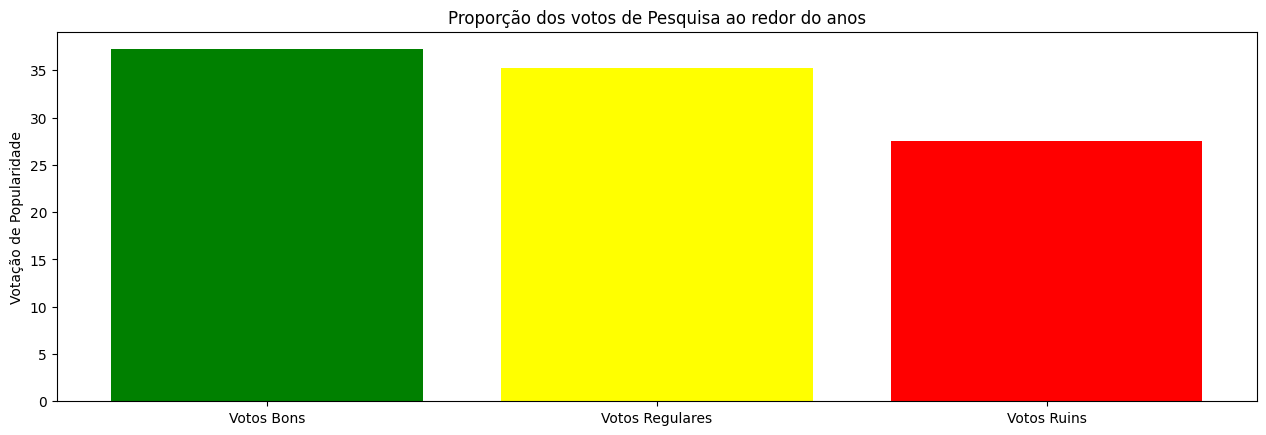

In [233]:
#Criaremos um gráfico de barras (coluna), 
#que receberá cont como tamanho dos dados, proporcao como 'y'
#Receberá também as cores de cada coluna, verde, amarelo e vermelho

#Xticks recebe os dados da variável x que no caso será pesquisa, e colocaremos nenhuma rotação no titulo das colunas
#Ylabel é definido como título das colunas em y
#Title define o título do gráfico que ficará logo em cima dele

plt.bar(cont, proporcao, color=['green', 'yellow', 'red']) 
plt.xticks(cont, pesquisa, rotation=0) 
plt.subplots_adjust(right = 2)
plt.ylabel('Votação de Popularidade') 
plt.title('Proporção dos votos de Pesquisa ao redor do anos') 
 
plt.show() 

In [0]:
covid = pd.read_csv("covid19.csv")

#Dados retirados do site:
#https://brasil.io/dataset/covid19/caso_full/?page=3
#usando a tabela "covid19-8369e44a27c245e6892c18cf1606b3ec"

In [0]:

#Neste passo, iremos filtrar os dados, trazendo para seus respectivos estados uma 
#tabela contendo seus dados separados, facilitando assim uma manipulação mais a frente

estados = covid.loc[covid["place_type"]=='state']

ac = estados.loc[estados["state"]=='AC']
al = estados.loc[estados["state"]=='AL']
ap = estados.loc[estados["state"]=='AP']
am = estados.loc[estados["state"]=='AM']
ba = estados.loc[estados["state"]=='BA']
ce = estados.loc[estados["state"]=='CE']
df = estados.loc[estados["state"]=='DF']
es = estados.loc[estados["state"]=='ES']
go = estados.loc[estados["state"]=='GO']
ma = estados.loc[estados["state"]=='MA']
mt = estados.loc[estados["state"]=='MT']
ms = estados.loc[estados["state"]=='MS']
mg = estados.loc[estados["state"]=='MG']
pa = estados.loc[estados["state"]=='PA']
pb = estados.loc[estados["state"]=='PB']
pr = estados.loc[estados["state"]=='PR']
pe = estados.loc[estados["state"]=='PE']
pi = estados.loc[estados["state"]=='PI']
rj = estados.loc[estados["state"]=='RJ']
rn = estados.loc[estados["state"]=='RN']
rs = estados.loc[estados["state"]=='RS']
ro = estados.loc[estados["state"]=='RO']
rr = estados.loc[estados["state"]=='RR']
sc = estados.loc[estados["state"]=='SC']
sp = estados.loc[estados["state"]=='SP']
se = estados.loc[estados["state"]=='SE']
to = estados.loc[estados["state"]=='TO']


In [0]:
#tivemos um filtro dos dados acima, e agora está na hora de somar as mortes por estado

Sac = sum(ac['new_deaths'])
Sal = sum(al['new_deaths'])
Sap = sum(ap['new_deaths'])
Sam = sum(am['new_deaths'])
Sba = sum(ba['new_deaths'])
Sce = sum(ce['new_deaths'])
Sdf = sum(df['new_deaths'])
Ses = sum(es['new_deaths'])
Sgo = sum(go['new_deaths'])
Sma = sum(ma['new_deaths'])
Smt = sum(mt['new_deaths'])
Sms = sum(ms['new_deaths'])
Smg = sum(mg['new_deaths'])
Spa = sum(pa['new_deaths'])
Spb = sum(pb['new_deaths'])
Spr = sum(pr['new_deaths'])
Spe = sum(pe['new_deaths'])
Spi = sum(pi['new_deaths'])
Srj = sum(rj['new_deaths'])
Srn = sum(rn['new_deaths'])
Srs = sum(rs['new_deaths'])
Sro = sum(ro['new_deaths'])
Srr = sum(rr['new_deaths'])
Ssc = sum(sc['new_deaths'])
Ssp = sum(sp['new_deaths'])
Sse = sum(se['new_deaths'])
Sto = sum(to['new_deaths'])


Acre - AC
Alagoas - AL
Amapá - AP
Amazonas - AM
Bahia  - BA
Ceará - CE
Distrito Federal  - DF
Espírito Santo - ES
Goiás - GO
Maranhão - MA
Mato Grosso - MT
Mato Grosso do Sul - MS
Minas Gerais - MG
Pará - PA
Paraíba - PB
Paraná - PR
Pernambuco - PE
Piauí - PI
Rio de Janeiro - RJ
Rio Grande do Norte - RN
Rio Grande do Sul - RS
Rondônia - RO
Roraima - RR
Santa Catarina - SC
São Paulo - SP
Sergipe - SE
Tocantins - TO


In [153]:
NEstados = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins']
Mortes = [Sac, Sal, Sap, Sam, Sba, Sce, Sdf, Ses, Sgo, Sma, Smt, Sms, Smg, Spa, Spb, Spr, Spe, Spi, Srj, Srn, Srs, Sro, Srr, Ssc, Ssp, Sse, Sto]
dado = {'NAME_1': NEstados, 'Mortes': Mortes}
inform = pd.DataFrame(data=dado)

#NEstados, recebe os nomes dos estados em ordem alfabética, como estava na tabela original
#Mortes recebe as mortes por COVID-19 considerando a ordem definida em NEstados
#Cria-se um dicionário que reberá as colunas criadas e as nomeará
#Em inform, o dicionário é convertido em data frame para ser manipulado mais a frente

print(inform)

                 NAME_1  Mortes
0                  Acre      57
1               Alagoas     187
2                 Amapá     103
3              Amazonas    1235
4                 Bahia     262
5                 Ceará    1566
6      Distrito Federal      55
7        Espírito Santo     249
8                 Goiás      67
9              Maranhão     524
10          Mato Grosso      24
11   Mato Grosso do Sul      14
12         Minas Gerais     146
13                 Pará    1175
14              Paraíba     170
15               Paraná     124
16           Pernambuco    1381
17                Piauí      65
18       Rio de Janeiro    2438
19  Rio Grande do Norte     117
20    Rio Grande do Sul     132
21             Rondônia      62
22              Roraima      40
23       Santa Catarina      79
24            São Paulo    4501
25              Sergipe      47
26            Tocantins      24


In [106]:
#Os mapas foram extraídos a partir do site:
# https://github.com/MRobalinho/GeoPandas_Brasil/tree/92c38c374c0ec3112f015e34a5148ec248390511/Shapes

# Tabelas Brasil e Estados /content/drive/My Drive/Mapa Brasil
#uf_br0 = Mapa fronteiras do Brasil
#uf_br1 = Mapa fronteiras dos estados brasileiros

uf_br0 = gpd.read_file('/content/drive/My Drive/Mapa Brasil/gadm36_BRA_0.shp')
uf_br1 = gpd.read_file('/content/drive/My Drive/Mapa Brasil/gadm36_BRA_1.shp')

geopandas.geodataframe.GeoDataFrame

Se digitado uf_br1 mostrará as tabelas relacionadas ao mapa
e ao digitar:

> 


uf_br1.plot(edgecolor='black', figsize=(20,8),column='NAME_1') 


> 


Mostrará o mapa em si!

In [127]:
uf_br1

#como se trata de um mapa, é simples mostrar os dados que são relacionados 
#a ele, somente digitando o nome da variavel que contem o mapa


,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,BRA,Brazil,BRA.1_1,Acre,None,None,Estado,State,None,BR.AC,"POLYGON ((-68.10553 -10.72192, -68.10547 -10.7..."
1,BRA,Brazil,BRA.2_1,Alagoas,None,None,Estado,State,None,BR.AL,"MULTIPOLYGON (((-35.88986 -9.84431, -35.88986 ..."
2,BRA,Brazil,BRA.3_1,Amapá,None,None,Estado,State,None,BR.AP,"MULTIPOLYGON (((-50.82570 2.52208, -50.82570 2..."
3,BRA,Brazil,BRA.4_1,Amazonas,Amazone,None,Estado,State,None,BR.AM,"POLYGON ((-58.13699 -7.35614, -58.13682 -7.356..."
4,BRA,Brazil,BRA.5_1,Bahia,Ba¡a,None,Estado,State,None,BR.BA,"MULTIPOLYGON (((-38.69208 -17.95958, -38.69208..."
5,BRA,Brazil,BRA.6_1,Ceará,None,None,Estado,State,None,BR.CE,"MULTIPOLYGON (((-40.83181 -2.88125, -40.83181 ..."
6,BRA,Brazil,BRA.7_1,Distrito Federal,None,None,Distrito Federal,Federal District,None,BR.DF,"POLYGON ((-47.93915 -16.05135, -48.02110 -16.0..."
7,BRA,Brazil,BRA.8_1,Espírito Santo,Espiritu Santo,None,Estado,State,None,BR.ES,"MULTIPOLYGON (((-40.88403 -21.16125, -40.88403..."
8,BRA,Brazil,BRA.9_1,Goiás,Goiáz|Goyáz,None,Estado,State,None,BR.GO,"POLYGON ((-49.00480 -18.53718, -49.01248 -18.5..."
9,BRA,Brazil,BRA.10_1,Maranhão,São Luíz de Maranhão,None,Estado,State,None,BR.MA,"MULTIPOLYGON (((-44.54986 -1.88458, -44.54986 ..."


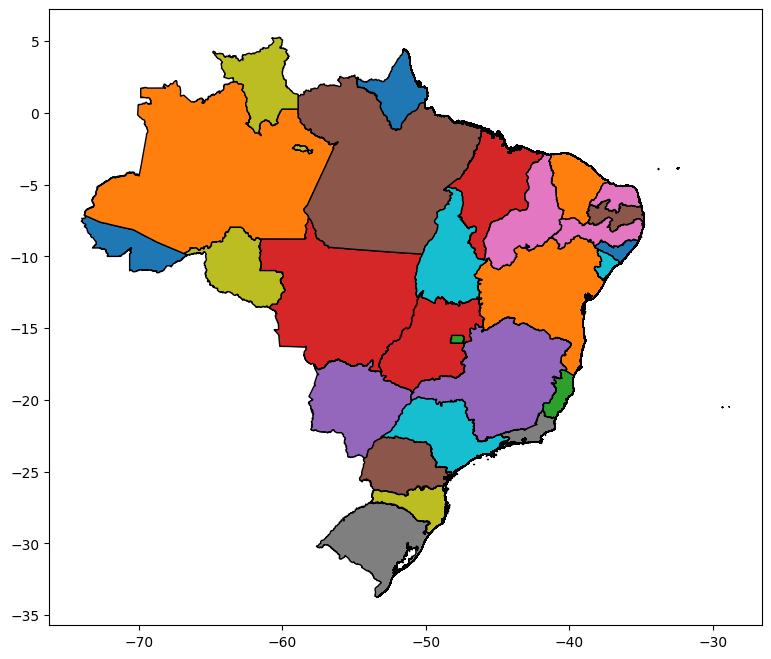

In [134]:
#Vou separar a tabela uf_br1 (Mapa) em dados que me interessam!
#Estou colocando a coluna nome, e a geometria do estado, que me interessam

MapaBrasil = uf_br1[['NAME_1','TYPE_1','geometry']]

#Plotando o gráfico MapaBrasil, mostrando que apesar de não ser a tabela original, o dados ainda são plotados
#edgecolor é a cor da borda do estado, figsize é o tamanho da imagem, 
#column definine as cores dos estados a partir de uma coluna

MapaBrasil.plot(edgecolor='black', figsize=(20,8), column='NAME_1')

In [0]:
#Fiz com o método concatenação antes, mas ele deixava uma coluna NAME_1 a mais e precisaria apagar a mesma depois
#result = pd.concat([MapaBrasil, inform], axis=1, sort=False)

result = pd.merge(MapaBrasil, inform, on='NAME_1')

#Em merge eu juntei as tabelas MapaBrasil e inform, relacionando-as com a coluan NAME_1 que tem nas duas

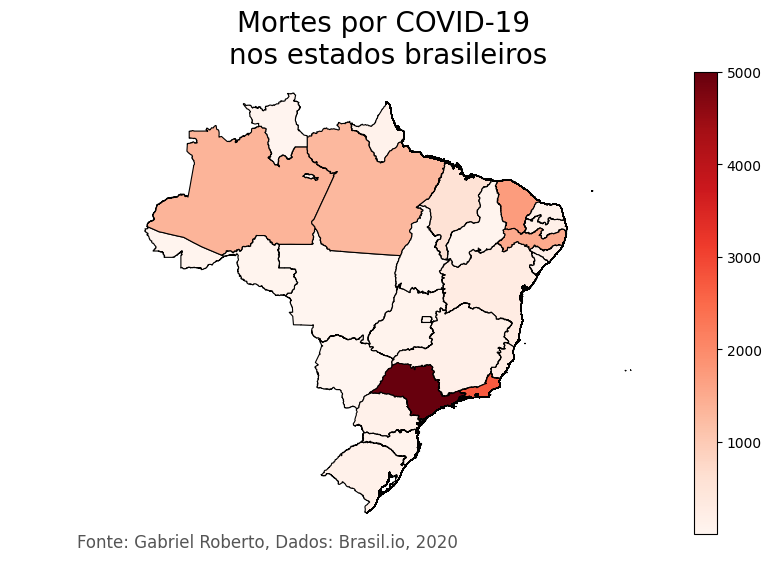

In [228]:
# define uma variável que chamará a coluna que quisermos visualizar no mapa
variável = 'Mortes'

# definir o intervalo para o choropleth
vmin, vmax = 5, 5000

# criar figura e eixos para o Matplotlib
fig, ax = plt.subplots (1, figsize = (10, 6))

#Criando o mapa

result.plot(column=variável, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='black')

#Ou posso criar o mapa chamando a string ao invés da variável, ela deve ser o nome da coluna da sua tabela criada antes
#result.plot(column='Mortes', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.5')

# remova o eixo que fica em volta do mapa
ax.axis ('off')

# Adicione um título
ax.set_title ('Mortes por COVID-19 \nnos estados brasileiros', 
              fontdict = {'fontsize': '20', 'fontweight': '3'})

# criar uma anotação para a fonte de dados
ax.annotate ('Fonte: Gabriel Roberto, Dados: Brasil.io, 2020', xy = (0.1, 0.08), 
             xycoords = 'figure fraction', 
             horizontalalignment = 'left', 
             verticalalignment = 'top', 
             fontsize = 12, 
             color = '#555555')

# Criando uma barra colorida lateral para servir como legenda
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# array vazio para o intervalo de dados
sm._A = []

# adicione a barra de cores à figura
cbar = fig.colorbar(sm)


In [0]:
covid = pd.read_csv("covid19.csv")

#Dados retirados do site:
#https://brasil.io/dataset/covid19/caso_full/?page=3
#usando a tabela "covid19-8369e44a27c245e6892c18cf1606b3ec"

#Neste passo, iremos filtrar os dados, trazendo para seus respectivos estados uma 
#tabela contendo seus dados separados, facilitando assim uma manipulação mais a frente

estados = covid.loc[covid["place_type"]=='state']

sp = estados.loc[estados["state"]=='SP']
k = {'Data': sp['date'], 'Confirmados': sp['new_confirmed']}

#Os dados de São Paulo foram filtrados e transformados em dicionários, logo em seguida, se tornaram um data frame

diario = pd.DataFrame(k)
print(diario)

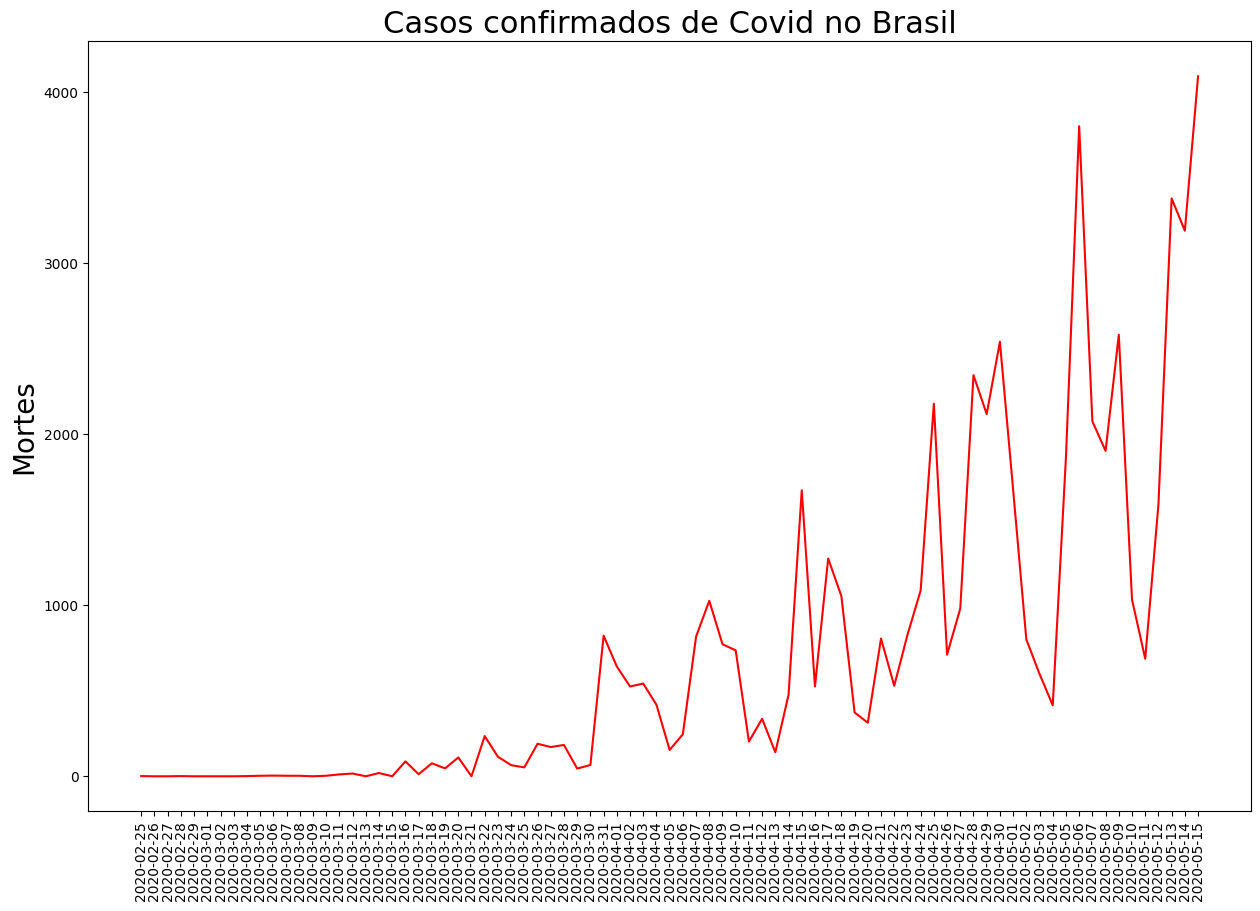

In [106]:
#plt.plot(x, y, cor)
#xticks(rotation) está servindo para rotacionar os titulos de coluna do eixo x, para melhor visualiza-los
#ax = plt.gca() e ax.invert_xaxis() juntos invertem o eixo x que será apresentado de forma melhor
#plt.rcParams['figure.figsize'] = (20,10) define o tamanho da imagem

plt.plot(diario['Data'], diario['Confirmados'], 'r')
plt.xticks(rotation=90)
ax = plt.gca()
ax.invert_xaxis()
plt.rcParams['figure.figsize'] = (20,10)
plt.title('Casos confirmados de Covid em São Paulo', loc='center', fontsize=22, fontweight=30) 
plt.ylabel('Mortes', {'color': 'black', 'fontsize': 20}) 
plt.show() 